<a href="https://colab.research.google.com/github/shriya4320/Cervical_Cancer_Assesment_ML_proj/blob/main/MLFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Cervical_Cancer_Pred(1).csv')

In [ ]:
data.drop(labels='Timestamp',axis=1)

,Age,Smoking,Pregnancies,DX:HPV,First intercourse,Hinselmann,Schiller,Citology,Biopsy,Oral Contraceptives,Cancer
0,35,0,0,1,18,1,0,1,1,1,1
1,42,1,2,1,20,0,1,0,1,0,1
2,51,0,3,1,19,1,0,1,1,1,1
3,29,1,1,1,17,0,1,1,1,1,1
4,47,0,0,1,21,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
595,21,0,1,0,17,0,0,0,0,1,0
596,51,0,0,0,33,0,0,0,0,0,0
597,45,1,2,1,28,0,1,0,1,0,0
598,30,0,1,0,20,0,0,0,0,0,0


Splitting the data into Input data and Target value

In [ ]:
X = data[['Age','Smoking','Pregnancies','DX:HPV','First intercourse','Hinselmann','Schiller','Citology','Biopsy','Oral Contraceptives']]
Y = data['Cancer']

Splitting the data into Testing and Training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=2)

Logistic Regression Model Import

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Logistic_Regression_model = LogisticRegression(solver = 'liblinear')

Training the model using training data


In [ ]:
Logistic_Regression_model.fit(X,Y)

LogisticRegression(solver='liblinear')

Testing the model prediction on training data itself


In [ ]:
X_train_predict = Logistic_Regression_model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
X_train_predict_accuracy = accuracy_score(Y_train, X_train_predict)
print(X_train_predict_accuracy)

0.9270833333333334


Testing the model on testing data


In [ ]:
X_test_predict = Logistic_Regression_model.predict(X_test)

In [ ]:
X_test_predict_accuracy = accuracy_score(Y_test, X_test_predict)
print(X_test_predict_accuracy)

0.8666666666666667


Precision, Accuracy, F1 Score and Recall for Test Data using Logistic Regression Model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tabulate import tabulate

Y_true = Y_test
Y_predicted = X_test_predict

precision = precision_score(Y_true, Y_predicted)

recall = recall_score(Y_true, Y_predicted)

f1 = f1_score(Y_true, Y_predicted)

table = [["Precision", precision],
         ["Recall", recall],
         ["F1 Score", f1],
         ["Accuracy", X_test_predict_accuracy]]

print(tabulate(table, headers=["Metric", "Value"], tablefmt="grid"))


+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Precision | 0.916667 |
+-----------+----------+
| Recall    | 0.785714 |
+-----------+----------+
| F1 Score  | 0.846154 |
+-----------+----------+
| Accuracy  | 0.866667 |
+-----------+----------+


Confusion Matrix for Test Data using Logistic Regression Model

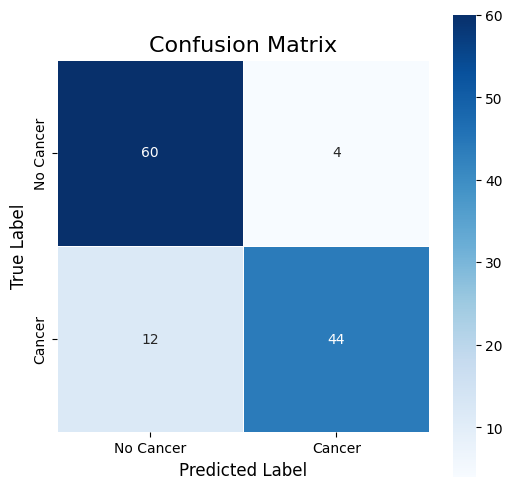

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_test, X_test_predict)

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("Confusion Matrix", fontsize=16)
ax = sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")

ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)

ax.xaxis.set_ticklabels(["No Cancer", "Cancer"])
ax.yaxis.set_ticklabels(["No Cancer", "Cancer"])

plt.show()

Random Forest Classifier Model import

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Random_Forest_model = RandomForestClassifier()

Training the model

In [ ]:
Random_Forest_model.fit(X_train,Y_train)

RandomForestClassifier()

Testing the model on training data itself

In [ ]:
X_train_predict_r = Random_Forest_model.predict(X_train)
X_train_predict_r_accuracy = accuracy_score(Y_train, X_train_predict)
print(X_train_predict_r_accuracy)

0.9270833333333334


Testing the model on testing data

In [ ]:
X_test_predict_r = Random_Forest_model.predict(X_test)
X_test_predict_r_accuracy = accuracy_score(Y_test, X_test_predict)
print(X_test_predict_r_accuracy)

0.8666666666666667


*Precision*, Accuracy, F1 Score and Recall for Test Data using Random Forest Model

In [ ]:
Y_true = Y_test
Y_predicted_r = X_test_predict_r

precision = precision_score(Y_true, Y_predicted_r)

recall = recall_score(Y_true, Y_predicted_r)

f1 = f1_score(Y_true, Y_predicted_r)

table = [["Precision", precision],
         ["Recall", recall],
         ["F1 Score", f1],
         ["Accuracy", X_test_predict_r_accuracy]]

print(tabulate(table, headers=["Metric", "Value"], tablefmt="grid"))


+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Precision | 0.94     |
+-----------+----------+
| Recall    | 0.839286 |
+-----------+----------+
| F1 Score  | 0.886792 |
+-----------+----------+
| Accuracy  | 0.866667 |
+-----------+----------+


Confusion Matrix for testing data using Random Forest Model

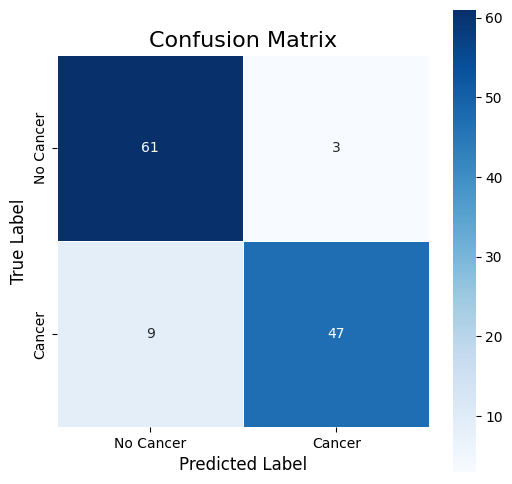

In [ ]:
cm = confusion_matrix(Y_test, X_test_predict_r)

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("Confusion Matrix", fontsize=16)
ax = sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")

ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)

ax.xaxis.set_ticklabels(["No Cancer", "Cancer"])
ax.yaxis.set_ticklabels(["No Cancer", "Cancer"])

plt.show()

Importing Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Decision_tree_model = DecisionTreeClassifier()

Training the model using training data

In [ ]:
Decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

Testing the model on training data itself

In [ ]:
X_train_predict_d = Decision_tree_model.predict(X_train)
X_train_predict_d_accuracy = accuracy_score(Y_train, X_train_predict_d)
print(X_train_predict_d_accuracy)

1.0


Testing the data on test data

In [ ]:
X_test_predict_d = Decision_tree_model.predict(X_test)
X_test_predict_d_accuracy = accuracy_score(Y_test, X_test_predict_d)
print(X_test_predict_d_accuracy)

0.8416666666666667


Precision, Accuracy, F1 Score and Recall for Test Data using Decision Tree Model

In [ ]:
Y_true = Y_test
Y_predicted_d = X_test_predict_d

precision = precision_score(Y_true, Y_predicted_d)

recall = recall_score(Y_true, Y_predicted_d)

f1 = f1_score(Y_true, Y_predicted_d)

table = [["Precision", precision],
         ["Recall", recall],
         ["F1 Score", f1],
         ["Accuracy", X_test_predict_d_accuracy]]

print(tabulate(table, headers=["Metric", "Value"], tablefmt="grid"))


+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Precision | 0.862745 |
+-----------+----------+
| Recall    | 0.785714 |
+-----------+----------+
| F1 Score  | 0.82243  |
+-----------+----------+
| Accuracy  | 0.841667 |
+-----------+----------+


Confusion Matrix for Decision Tree Model

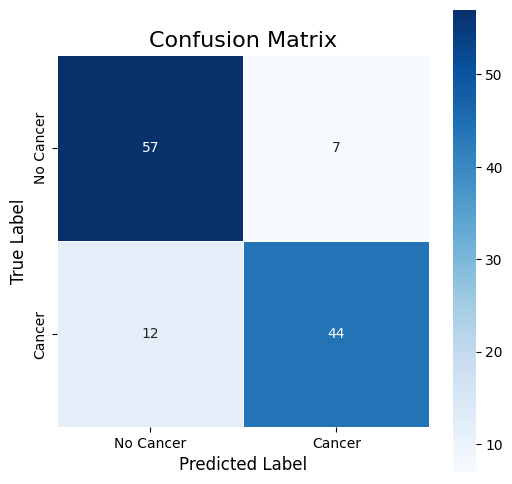

In [ ]:
cm = confusion_matrix(Y_test, X_test_predict_d)

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("Confusion Matrix", fontsize=16)
ax = sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")

ax.set_xlabel("Predicted Label", fontsize=12)
ax.set_ylabel("True Label", fontsize=12)

ax.xaxis.set_ticklabels(["No Cancer", "Cancer"])
ax.yaxis.set_ticklabels(["No Cancer", "Cancer"])

plt.show()

Histogram for Age vs Cancer to figure out which age group is more prone to Cervical cancer

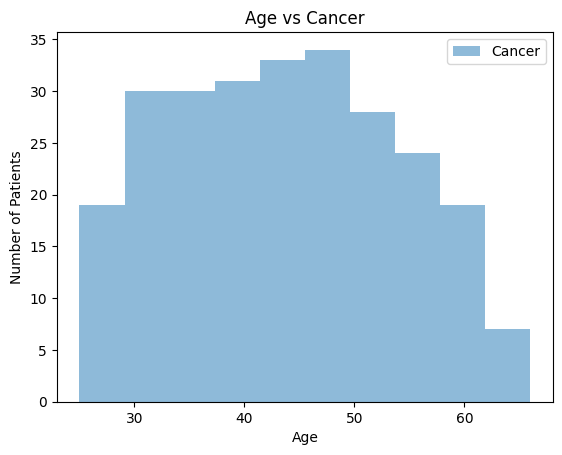

In [ ]:
import matplotlib.pyplot as plt

age = data['Age']
cancer = data['Cancer']

plt.hist(age[cancer == 1], bins=10, alpha=0.5, label='Cancer')

plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age vs Cancer')

plt.legend()
plt.show()


Histogram graph to analyse does HPV increases the chances of Cervical cancer

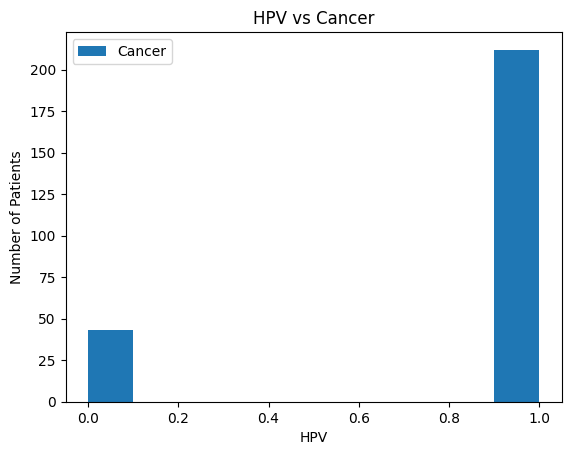

In [ ]:
import matplotlib.pyplot as plt
# Extract the HPV and cancer columns from the data
hpv = data['DX:HPV']
cancer = data['Cancer']

# Create the histogram
plt.hist(hpv[cancer == 1], bins=10, alpha=1, label='Cancer')

# Add labels and title
plt.xlabel('HPV')
plt.ylabel('Number of Patients')
plt.title('HPV vs Cancer')

# Add legend and show the plot
plt.legend()
plt.show()


Histogram graph to for First Intercourse vs Cancer to see which zone is more likely to develop cancerous cells

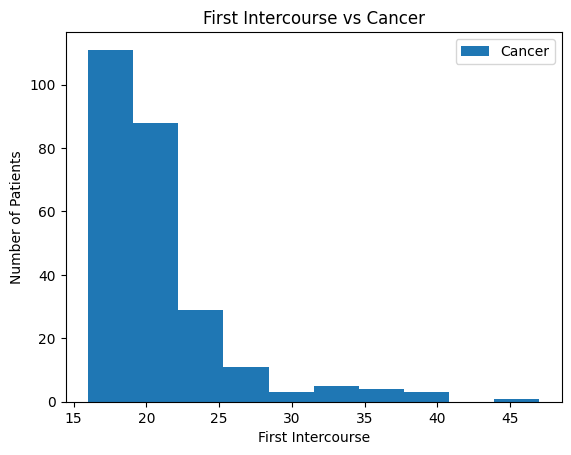

In [ ]:
import matplotlib.pyplot as plt
# Extract the first intercourse and cancer columns from the data
fintercourse = data['First intercourse']
cancer = data['Cancer']

# Create the histogram
plt.hist(fintercourse[cancer == 1], bins=10, alpha=1, label='Cancer')

# Add labels and title
plt.xlabel('First Intercourse')
plt.ylabel('Number of Patients')
plt.title('First Intercourse vs Cancer')

# Add legend and show the plot
plt.legend()
plt.show()


Histogram graph to find out if Oral Contraceptives increase the chances of Cervical cancer

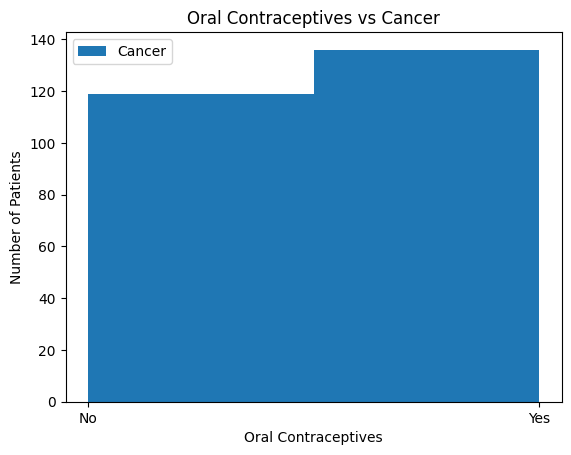

In [ ]:
import matplotlib.pyplot as plt
# Extract the oral contraceptives and cancer columns from the data
contraceptive = data['Oral Contraceptives']
cancer = data['Cancer']

# Create the histogram
plt.hist(contraceptive[cancer == 1], bins=2, alpha=1, label='Cancer')

# Add labels and title
plt.xlabel('Oral Contraceptives')
plt.ylabel('Number of Patients')
plt.title('Oral Contraceptives vs Cancer')

# Add space between 0 and 1 on the x-axis
plt.xticks([0, 1], ['No', 'Yes'])

# Add legend and show the plot
plt.legend()
plt.show()


Bar graph for comparing the training data and testing data accuracies across different models

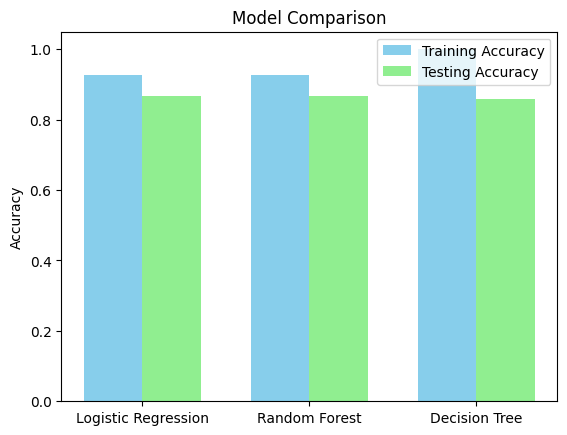

In [ ]:
import matplotlib.pyplot as plt
# Create a list of model names
models = ["Logistic Regression", "Random Forest", "Decision Tree"]

# Create a list of training accuracies
train_accuracies = [X_train_predict_accuracy, X_train_predict_r_accuracy, X_train_predict_d_accuracy]

# Create a list of testing accuracies
test_accuracies = [X_test_predict_accuracy, X_test_predict_r_accuracy, X_test_predict_d_accuracy]

# Create a bar chart

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='lightgreen')

ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


Generating Heatmap to find out the correlation between different input data

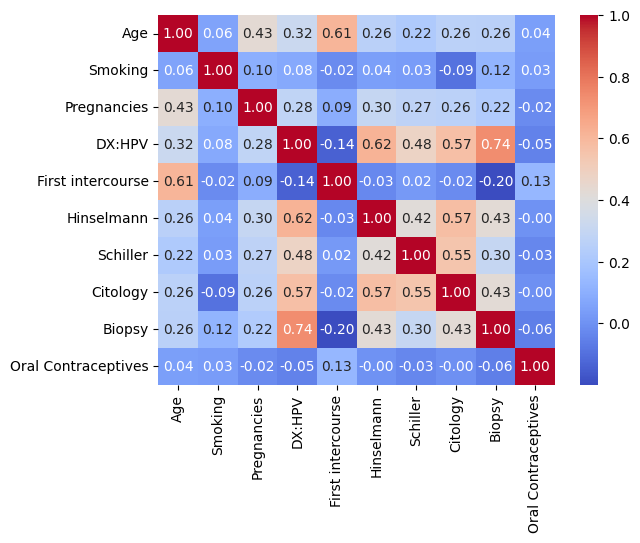

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data[['Age','Smoking','Pregnancies','DX:HPV','First intercourse','Hinselmann','Schiller','Citology','Biopsy','Oral Contraceptives']].corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.show()


Trying K-means Model for prediction

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train,Y_train)
y_kmeans = kmeans.predict(X_test)
y_kmeans_accuracy = accuracy_score(Y_test,y_kmeans)
print(y_kmeans_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5916666666666667


In [ ]:
import joblib

joblib.dump(Random_Forest_model, '/content/drive/My Drive/RandomForestModel.pkl')

['/content/drive/My Drive/RandomForestModel.pkl']

In [ ]:
import shutil
model_file_path = '/content/drive/My Drive/RandomForestModel.pkl'
destination_path = '/content/RandomForestModel.pkl'

shutil.copyfile(model_file_path, destination_path)

'/content/RandomForestModel.pkl'

In [ ]:
from google.colab import files

destination_path = '/content/drive/My Drive/RandomForestModel.pkl'

files.download(destination_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>